In [1]:
import pandas as pd
import numpy as  np
import matplotlib.pylab as plt
import string  
import time, datetime

### 读入表


In [2]:
tab1 = "./hair_dryer.tsv"
tab2 = "./clean_data.csv"
print(tab1)

#reviews = pd.read_csv(tab1, sep='\t', header=0,low_memory=False)
reviews = pd.read_csv(tab1, sep='\t', low_memory=False)
#reviews = pd.read_csv(tab2,low_memory=False)
reviews.columns = ['marketplace','customer_id', 'review_id', 'product_id', 'product_parent', 'product_title', 'product_category', 
                   'star_rating','helpful_votes', 'total_votes','vine',
                   'verified_purchase','review_headline','review_body','review_date']
reviews = reviews.loc[reviews['product_parent']==758099411]

./hair_dryer.tsv


In [3]:
reviews.nunique()




marketplace            1
customer_id          535
review_id            535
product_id             1
product_parent         1
product_title          1
product_category       1
star_rating            5
helpful_votes         24
total_votes           27
vine                   1
verified_purchase      2
review_headline      413
review_body          533
review_date          437
dtype: int64

Total ratings : 535
Total users : 535
Users giving bulk ratings (more than 10) : 0
Bulk ratings : 0
Populations of bulk ratings : 0.0
Populations of bulk users : 0.0


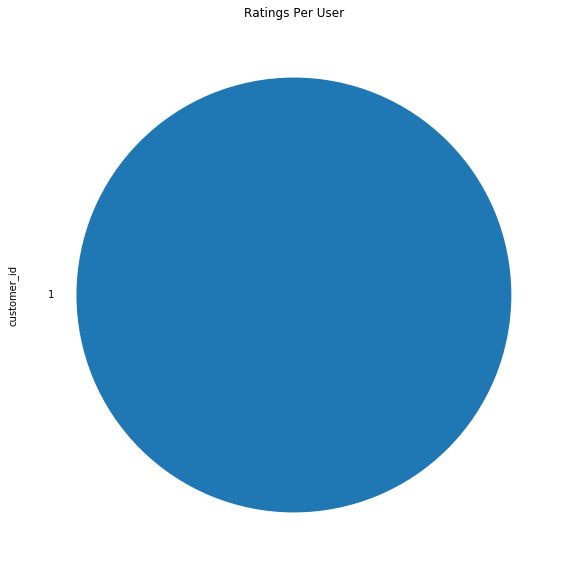

In [4]:
rating_perperson=reviews.customer_id.value_counts()
print ("Total ratings : " + str(sum(rating_perperson)))
print ("Total users : " + str(len(rating_perperson)))
print("Users giving bulk ratings (more than 10) : " + str(sum(rating_perperson >10)))
bulk = rating_perperson[rating_perperson >3]
bulk_rating = sum(bulk)
print ("Bulk ratings : " + str(bulk_rating))
print ("Populations of bulk ratings : " + str(bulk_rating*100/sum(rating_perperson)))
print ("Populations of bulk users : " + str(sum(rating_perperson >10)*100/len(rating_perperson)))
rating_perperson.value_counts().plot(kind='pie',figsize=(10,10), title='Ratings Per User')

*** Rating distribution ***
5    323
4    114
3     49
2     32
1     17
Name: star_rating, dtype: int64


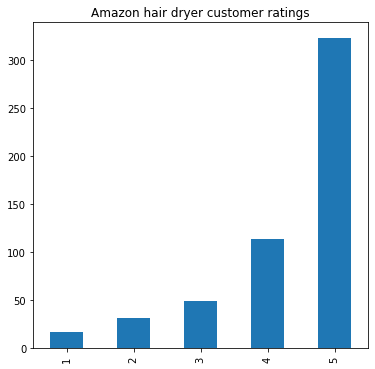

In [5]:
from matplotlib import pyplot
%matplotlib inline

star = reviews.star_rating.value_counts()
print("*** Rating distribution ***")
print(star)
star.sort_index(inplace=True)
star.plot(kind='bar',title='Amazon hair dryer customer ratings',figsize=(6,6),style='Solarize_Light2')

### NPS

Net Promoters Score helps us evaluate customer satisfaction and loyalty
Rating 1,2,3 - Detractors
Rating 4 - Passive
Rating 5 - Promoters

In [6]:
NPS_score = round (100*((star.loc[4:5])-sum(star.loc[1:2]))/sum(star.loc[:]),2)
print (" NPS score of hair dryer is : "  + str(NPS_score))

 NPS score of hair dryer is : 4    12.15
5    51.21
Name: star_rating, dtype: float64


### 得到邀请的人数

In [7]:
reviews.vine.value_counts()

### 得到邀请和未到邀请的比较

N    535
Name: vine, dtype: int64

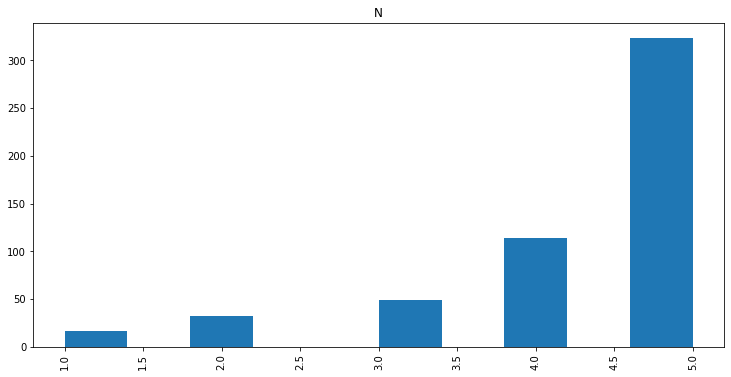

In [8]:
reviews.star_rating.hist(by=reviews.vine,figsize=(12,6))


### 确认购买的人数

In [9]:
reviews.verified_purchase.value_counts()

### 得到邀请和未到邀请的比较

Y    506
N     29
Name: verified_purchase, dtype: int64

array([<matplotlib.axes._subplots.AxesSubplot object at 0x113602f60>,
      dtype=object)

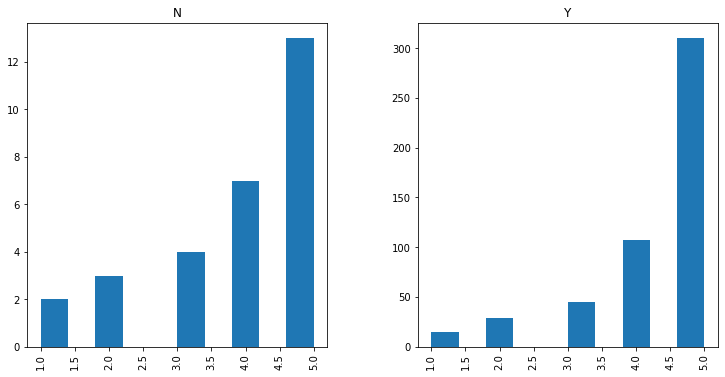

In [10]:
reviews.star_rating.hist(by=reviews.verified_purchase,figsize=(12,6))


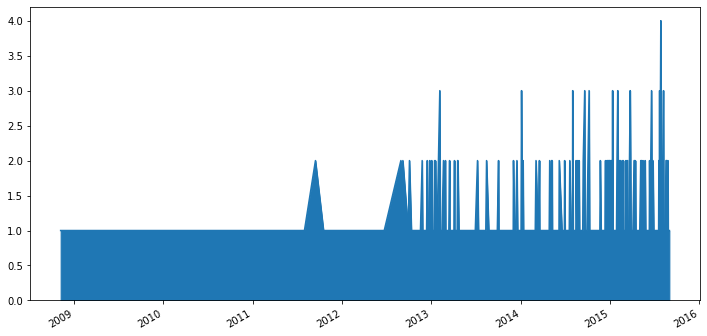

In [11]:
#reviews['temp'] = reviews.review_date.apply(lambda x : pd.to_datetime(x))
#reviews = reviews.set_index('temp')
reviews['review_date'] = pd.to_datetime(reviews['review_date'])
review_dates = reviews.review_date.value_counts()
review_dates.sort_index(inplace=True)
review_dates.plot(kind='area',figsize=(12,6))

### 对前100数量的日期按月份统计

In [12]:
rating_perdate = review_dates.sort_values(ascending=False)
peakrating = rating_perdate[:100]
peak_month=[]
for x in peakrating.index:
    peak_month.append(pd.to_datetime(x).month)
pd.Series(peak_month).value_counts()


 

3     19
4     12
8     11
12    10
1     10
2      9
5      8
7      7
6      5
9      4
10     3
11     2
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113de9550>]],
      dtype=object)

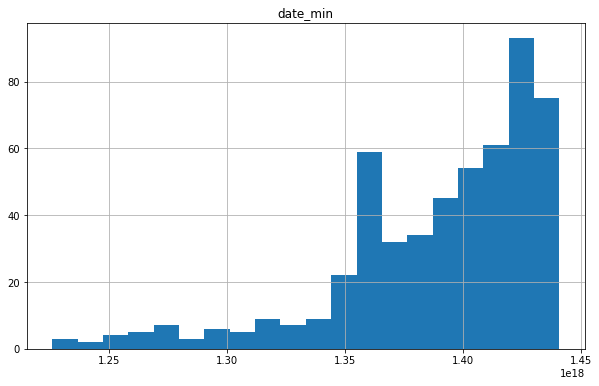

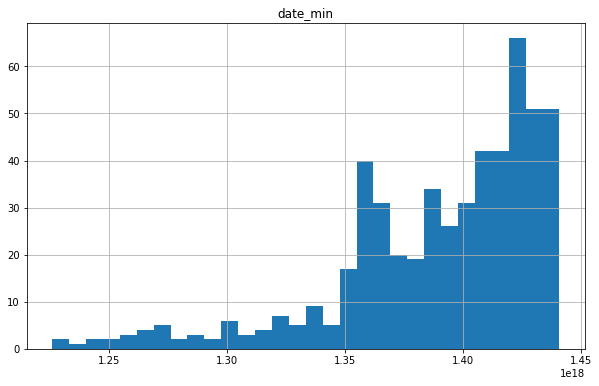

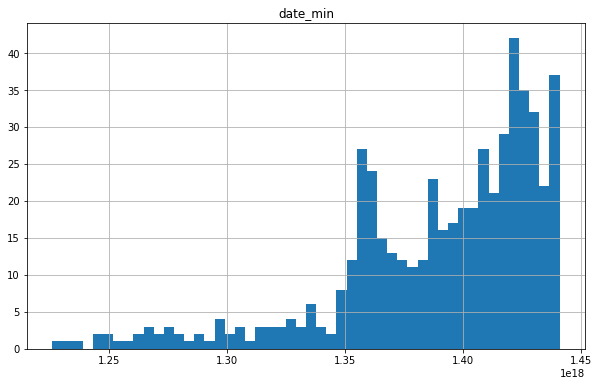

In [13]:
rating_series = pd.DataFrame(reviews.review_date)
dforms=[]
for x in rating_series.review_date:
    dforms.append((pd.to_datetime(x)).value)
# now we have dforms which has dates transformed to numeric values
rating2 = rating_series.assign(date_min = dforms)
rating2.reset_index(inplace=True)
#rating2.set_index('date_min')
#rating2.columns=['timestamp_string','review_count','date_min']
bins = np.linspace(min(rating2.date_min),max(rating2.date_min),num=50)
rating2.hist(column='date_min', bins=20,figsize=(10,6),)
rating2.hist(column='date_min', bins=30,figsize=(10,6))
rating2.hist(column='date_min', bins=50,figsize=(10,6))

In [14]:
def NPS_eval (A):
    score =0
    for x in A[:]:
        if (x>4) :
            score+=1
        elif (x<4) :
            score-=1
    return 100*score/len(A)  


In [15]:
def STAR_eval (A):
    score =0
    for x in A[:]:
        score+=x
    return score/len(A)  

In [16]:
#NPS_overtime = reviews[['temp','star_rating']]

#NPS_overtime.groupby(by='temp').agg(STAR_eval).plot(figsize=(15,10))

NPS_overtime = reviews[['review_date','review_id']]

#NPS_overtime.groupby(by='temp').agg(NPS_overtime.review_id.value_counts()).plot(figsize=(15,10))


In [17]:
NPS_overtime = NPS_overtime.set_index('review_date')

In [18]:
#NPS_overtime=NPS_overtime.to_period('M')

AxesSubplot(0.125,0.125;0.775x0.755)


,review_id
review_date,
2008-10-01,1
2009-04-01,1
2009-01-01,2
2010-07-01,2
2009-07-01,3
2009-10-01,3
2010-10-01,3
2011-04-01,4
2011-07-01,4


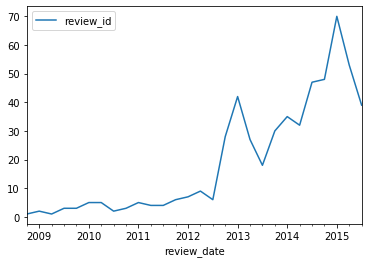

In [19]:


#NPS_overtime['timeline']= NPS_overtime['temp'].apply(lambda x : (x.month+(12*(x.year-2013))))
#NPS_overtime['10dayline']= NPS_overtime['temp'].apply(lambda x : (x.day//10+x.month*3+(36*(x.year-2014))))
#NPS_overtime['timeline']= NPS_overtime['temp'].apply(lambda x : (x.month+x.year*100))
#NPS_overtime=NPS_overtime.loc[NPS_overtime['10dayline']>=0]
#NPS_overtime=NPS_overtime.loc[NPS_overtime['timeline']>=0]
#NPS_by_month= NPS_overtime.groupby(by='timeline').agg(NPS_eval)
#NPS_by_10day =  NPS_overtime.groupby(by='10dayline').agg(STAR_eval)

NPS_by_month= NPS_overtime.resample('QS').count()
print(NPS_by_month.plot())
NPS_by_month.sort_values(by='review_id')
# NPS_by_month.sort_values(by='star_rating')
# print(NPS_by_10day.plot())
# NPS_by_10day.sort_values(by='star_rating')

### LSTM

In [20]:
import numpy
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
import  pandas as pd
import  os
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential, load_model

Using TensorFlow backend.


In [21]:
#dataset = NPS_by_10day
dataset = NPS_by_month
dataset = dataset.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

train_size = int(len(dataset) * 0.65)
trainlist = dataset[:train_size]
testlist = dataset[train_size:]

In [22]:
def create_dataset(dataset, look_back):
#这里的look_back与timestep相同
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return numpy.array(dataX),numpy.array(dataY)
#训练数据太少 look_back并不能过大

#训练数据太少 look_back并不能过大

In [23]:
look_back = 1
trainX,trainY  = create_dataset(trainlist,look_back)
testX,testY = create_dataset(testlist,look_back)

In [24]:
trainX = numpy.reshape(trainX, (trainX.shape[0], trainX.shape[1], 1))
testX = numpy.reshape(testX, (testX.shape[0], testX.shape[1] ,1 ))

# create and fit the LSTM network
model = Sequential()
model.add(LSTM(4, input_shape=(None,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=100, batch_size=1, verbose=2)
model.save(os.path.join("Test" + ".h5"))

Epoch 1/100
 - 0s - loss: 0.0106
Epoch 2/100
 - 0s - loss: 0.0094
Epoch 3/100
 - 0s - loss: 0.0085
Epoch 4/100
 - 0s - loss: 0.0080
Epoch 5/100
 - 0s - loss: 0.0078
Epoch 6/100
 - 0s - loss: 0.0076
Epoch 7/100
 - 0s - loss: 0.0075
Epoch 8/100
 - 0s - loss: 0.0075
Epoch 9/100
 - 0s - loss: 0.0074
Epoch 10/100
 - 0s - loss: 0.0075
Epoch 11/100
 - 0s - loss: 0.0075
Epoch 12/100
 - 0s - loss: 0.0075
Epoch 13/100
 - 0s - loss: 0.0074
Epoch 14/100
 - 0s - loss: 0.0075
Epoch 15/100
 - 0s - loss: 0.0074
Epoch 16/100
 - 0s - loss: 0.0074
Epoch 17/100
 - 0s - loss: 0.0074
Epoch 18/100
 - 0s - loss: 0.0075
Epoch 19/100
 - 0s - loss: 0.0074
Epoch 20/100
 - 0s - loss: 0.0074
Epoch 21/100
 - 0s - loss: 0.0074
Epoch 22/100
 - 0s - loss: 0.0075
Epoch 23/100
 - 0s - loss: 0.0075
Epoch 24/100
 - 0s - loss: 0.0074
Epoch 25/100
 - 0s - loss: 0.0074
Epoch 26/100
 - 0s - loss: 0.0073
Epoch 27/100
 - 0s - loss: 0.0074
Epoch 28/100
 - 0s - loss: 0.0074
Epoch 29/100
 - 0s - loss: 0.0073
Epoch 30/100
 - 0s - lo

In [25]:
#model = load_model(os.path.join("DATA","Test" + ".h5"))
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)

#反归一化
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(trainY)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(testY)

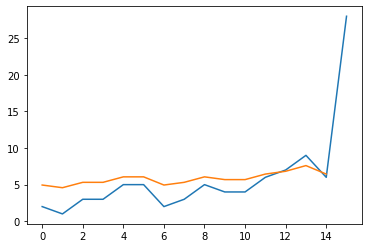

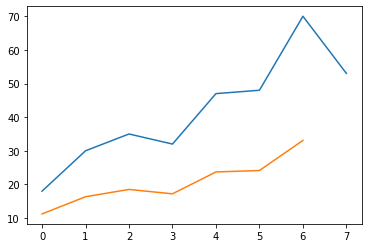

In [26]:
plt.plot(trainY)
plt.plot(trainPredict[1:])
plt.show()
plt.plot(testY)
plt.plot(testPredict[1:])
plt.show()



### arima
下面是arima

In [102]:
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pylab as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose

In [103]:
df = NPS_by_month

ts = df['review_id'] 


ts.head()

review_date
2008-10-01    1
2009-01-01    2
2009-04-01    1
2009-07-01    3
2009-10-01    3
Freq: QS-JAN, Name: review_id, dtype: int64

In [104]:

# 移动平均图
def draw_trend(timeseries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeseries.rolling(window=size).mean()
    # 对size个数据移动平均的方差
    rol_std = timeseries.rolling(window=size).std()
 
    timeseries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_std.plot(color='black', label='Rolling standard deviation')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')

In [105]:
def draw_ts(timeseries):
    f = plt.figure(facecolor='white')
    timeseries.plot(color='blue')
    plt.show()


In [106]:

def teststationarity(ts):
    dftest = adfuller(ts)
    # 对上述函数求得的值进行语义描述
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    return dfoutput

下面查看均值和方差

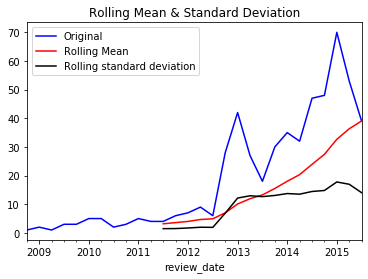

In [107]:
draw_trend(ts,12)

看Dickey-Fuller的结果

In [108]:
teststationarity(ts)

Test Statistic                 -1.196121
p-value                         0.675262
#Lags Used                      0.000000
Number of Observations Used    27.000000
Critical Value (1%)            -3.699608
Critical Value (5%)            -2.976430
Critical Value (10%)           -2.627601
dtype: float64

对数变换

In [109]:
ts_log = np.log(ts)

根据平滑技术的不同，平滑法具体分为移动平均法和指数平均法。

移动平均即利用一定时间间隔内的平均值作为某一期的估计值，而指数平均则是用变权的方法来计算均值。

移动平均：

In [110]:
def draw_moving(timeSeries, size):
    f = plt.figure(facecolor='white')
    # 对size个数据进行移动平均
    rol_mean = timeSeries.rolling(window=size).mean()
    # 对size个数据进行加权移动平均
    #rol_weighted_mean = timeSeries.ewm(span=size)
    rol_weighted_mean=timeSeries.ewm(halflife=size,min_periods=0,adjust=True,ignore_na=False).mean()
 
    timeSeries.plot(color='blue', label='Original')
    rol_mean.plot(color='red', label='Rolling Mean')
    rol_weighted_mean.plot(color='black', label='Weighted Rolling Mean')
    plt.legend(loc='best')
    plt.title('Rolling Mean')
    plt.show()

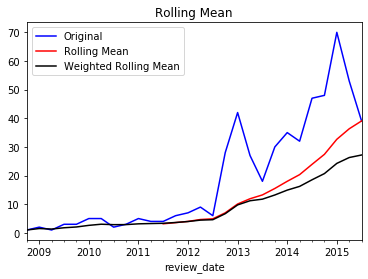

In [111]:
draw_moving(ts,12)

差分

In [112]:
diff_12 = ts_log.diff(12)
diff_12.dropna(inplace=True)
diff_12_1 = diff_12.diff(1)
diff_12_1.dropna(inplace=True)
teststationarity(diff_12_1)


Test Statistic                 -5.334487
p-value                         0.000005
#Lags Used                      1.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64

分解

In [113]:

def decompose(timeseries):
    
    # 返回包含三个部分 trend（趋势部分） ， seasonal（季节性部分） 和residual (残留部分)
    decomposition = seasonal_decompose(timeseries)
    
    trend = decomposition.trend
    seasonal = decomposition.seasonal
    residual = decomposition.resid
    
    plt.subplot(411)
    plt.plot(ts_log, label='Original')
    plt.legend(loc='best')
    plt.subplot(412)
    plt.plot(trend, label='Trend')
    plt.legend(loc='best')
    plt.subplot(413)
    plt.plot(seasonal,label='Seasonality')
    plt.legend(loc='best')
    plt.subplot(414)
    plt.plot(residual, label='Residuals')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()
    return trend , seasonal, residual

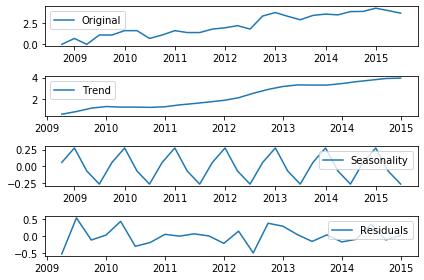

Test Statistic                -7.398647e+00
p-value                        7.658381e-11
#Lags Used                     9.000000e+00
Number of Observations Used    1.400000e+01
Critical Value (1%)           -4.012034e+00
Critical Value (5%)           -3.104184e+00
Critical Value (10%)          -2.690987e+00
dtype: float64

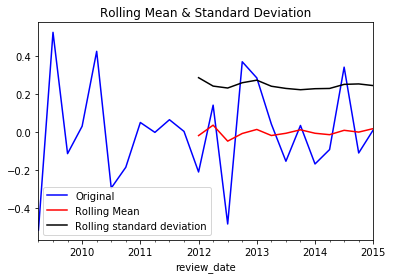

In [114]:
trend , seasonal, residual = decompose(ts_log)
residual.dropna(inplace=True)
draw_trend(residual,12)
teststationarity(residual)

### 预测

In [115]:
rol_mean = ts_log.rolling(window=12).mean()
rol_mean.dropna(inplace=True)
ts_diff_1 = rol_mean.diff(1)
ts_diff_1.dropna(inplace=True)
teststationarity(ts_diff_1)

Test Statistic                 -4.401407
p-value                         0.000295
#Lags Used                      0.000000
Number of Observations Used    15.000000
Critical Value (1%)            -3.964443
Critical Value (5%)            -3.084908
Critical Value (10%)           -2.681814
dtype: float64

In [116]:
ts_diff_2 = ts_diff_1.diff(1)
ts_diff_2.dropna(inplace=True)
teststationarity(ts_diff_2)

Test Statistic                 -5.334487
p-value                         0.000005
#Lags Used                      1.000000
Number of Observations Used    13.000000
Critical Value (1%)            -4.068854
Critical Value (5%)            -3.127149
Critical Value (10%)           -2.701730
dtype: float64

In [117]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
def draw_acf_pacf(ts,lags):
    f = plt.figure(facecolor='white')
    ax1 = f.add_subplot(211)
    plot_acf(ts,ax=ax1,lags=lags)
    ax2 = f.add_subplot(212)
    plot_pacf(ts,ax=ax2,lags=lags)
    plt.subplots_adjust(hspace=0.5)
    plt.show()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


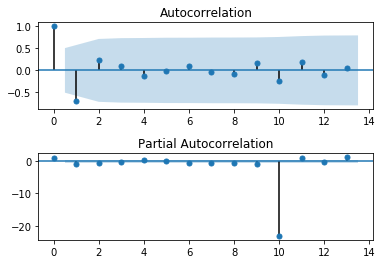

In [119]:
#draw_acf_pacf(ts_diff_2,30)
draw_acf_pacf(ts_diff_2,13)

In [120]:
from statsmodels.tsa.arima_model import ARIMA
# model = ARIMA(ts_diff_1, order=(1,1,1)) 
model = ARIMA(ts_diff_1, order=(1,1,0))
result_arima = model.fit( disp=-1, method='css')

In [121]:
predict_ts = result_arima.predict()
# 一阶差分还原
diff_shift_ts = ts_diff_1.shift(1)
diff_recover_1 = predict_ts.add(diff_shift_ts)
# 再次一阶差分还原
rol_shift_ts = rol_mean.shift(1)
diff_recover = diff_recover_1.add(rol_shift_ts)
# 移动平均还原
rol_sum = ts_log.rolling(window=11).sum()
rol_recover = diff_recover*12 - rol_sum.shift(1)
# 对数还原
log_recover = np.exp(rol_recover)
log_recover.dropna(inplace=True)

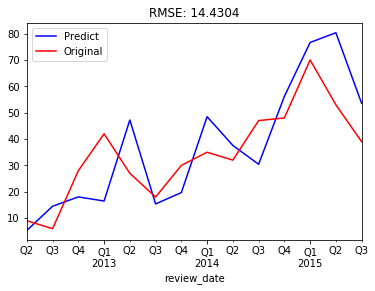

In [122]:
ts = ts[log_recover.index]  # 过滤没有预测的记录plt.figure(facecolor='white')
log_recover.plot(color='blue', label='Predict')
ts.plot(color='red', label='Original')
plt.legend(loc='best')
plt.title('RMSE: %.4f'% np.sqrt(sum((log_recover-ts)**2)/ts.size))
plt.show()

In [ ]:
print('google')
